In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn


In [2]:
# We are dropping the first column, So we start it from 1 2 3 4. 


df=pd.read_csv("Advertising.csv",usecols=[1,2,3,4])

In [3]:
df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [4]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [5]:
df.tail()

TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

In [6]:
df.shape

(200, 4)

# Datatype 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [9]:
df.describe().T

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

# Checking Null Values

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Relationship - Predictor and Response


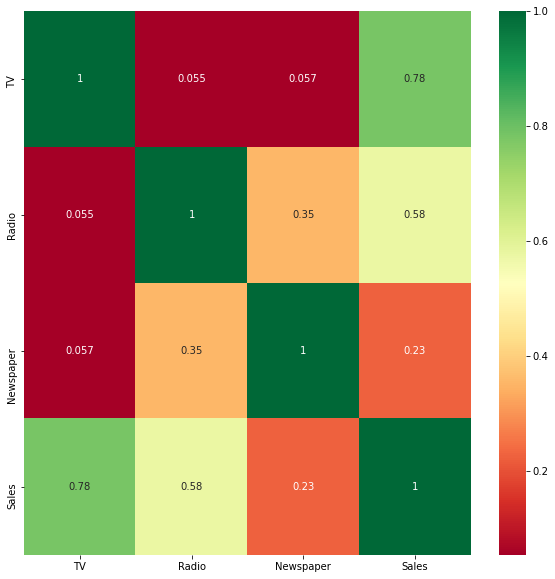

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))

#heatmap of the data

g = sns.heatmap(df[top_corr_features].corr(),annot = True, cmap="RdYlGn")

In [12]:
df.corr()   #Correlation between Variables.

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

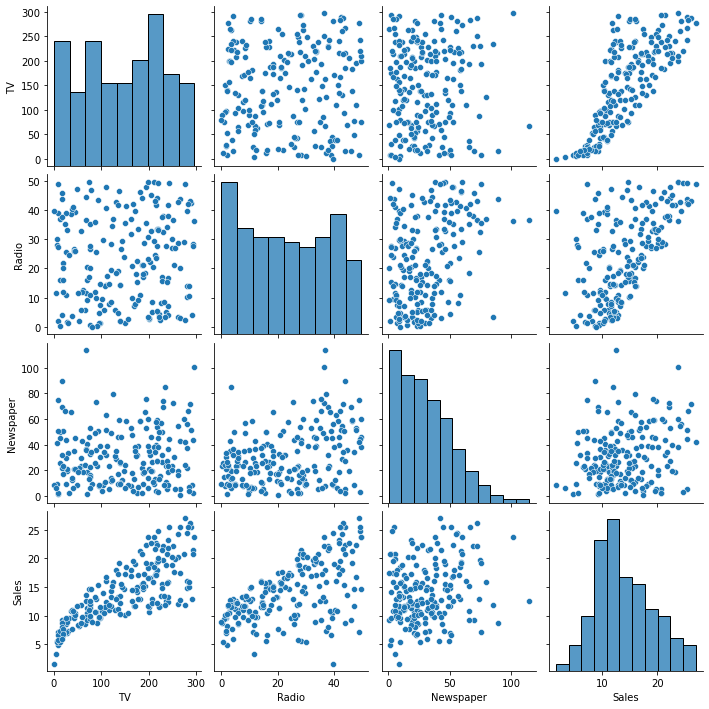

In [13]:
# Pair plot of correlation

import seaborn as sns
sns.pairplot(df)

In [14]:
import warnings
warnings.filterwarnings("ignore")

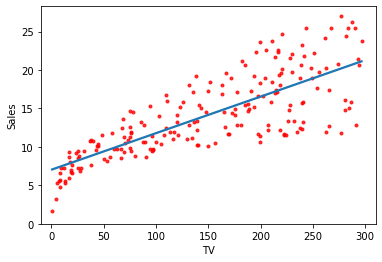

In [15]:
sns.regplot(df.TV, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9}) 
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show() 

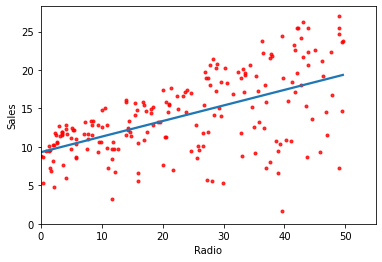

In [16]:
sns.regplot(df.Radio, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9}) 
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.show() 

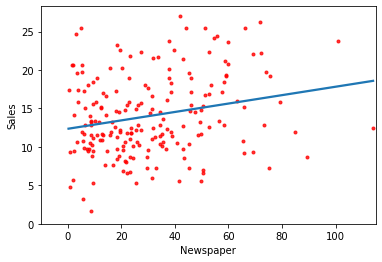

In [17]:
sns.regplot(df.Newspaper, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9}) 
plt.xlim(-10,115)  
plt.ylim(bottom=0)
plt.show() 

# Data Normalization


# Scaling the TV Data.


In [18]:
from sklearn.preprocessing import scale
X = scale(df.TV, with_mean=True, with_std=False).reshape(-1,1)
y = df.Sales     

In [19]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [20]:
X.mean()

1.0089706847793422e-14

In [21]:
X.std()

85.63933175679269

# Linear Regression for Scaled Data using Sklearn

In [22]:
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression

regr = skl_lm.LinearRegression()
regr.fit(X,y)
LinearRegression()
regr.intercept_ 

14.0225

In [23]:
regr.coef_

array([0.04753664])

In [24]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)

In [25]:
min_rss

2102.5305831313512

# Linaer Regression for Unscaled Data using Sklearn

In [26]:
regr = skl_lm.LinearRegression()
X = df.TV.values.reshape(-1,1)
y = df.Sales
regr.fit(X,y)

LinearRegression()

In [27]:
regr.intercept_

7.032593549127693

In [28]:
regr.coef_

array([0.04753664])

# Residual Sum of Squares

In [29]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)

In [30]:
min_rss

2102.5305831313512

# MSE


In [31]:
mse = min_rss/len(y) 
mse

10.512652915656757

# R-Sq using Sklearn


In [32]:

from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred) 


0.611875050850071

# MSE using SKLearn



In [33]:
mean_squared_error(y, Sales_pred)

10.512652915656757

# Regression using Statsmodel

In [34]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y,X2) 
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.47e-42
Time:                        23:29:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
import statsmodels.formula.api as smf
est = smf.ols('Sales ~ TV', df).fit()
est.summary()   # est.summary().tables[0/1/2]   


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.47e-42
Time:                        23:29:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Regression RSS and MSE
est.params                         


Intercept    7.032594
TV           0.047537
dtype: float64

In [37]:
# RSS
((df.Sales - (est.params[0] + est.params[1] * df.TV))** 2).sum()


2102.5305831313512

In [38]:
# MSE
((df.Sales - (est.params[0] + est.params[1]*df.TV))** 2).sum()/len(df.Sales)


10.512652915656757

In [39]:
# Linear Regression Sales and Radio

est = smf.ols('Sales ~ Radio', df).fit()



In [40]:
print(est.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [41]:
# Linear Regression Sales and Newspaper

est = smf.ols('Sales ~ Newspaper', df).fit()
print(est.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


# Multiple Linear Regression


In [42]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.58e-96
Time:                        23:29:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
regr.predict([[20]])

array([7.98332636])

In [44]:
regr.fit(df.drop('Sales',axis='columns'),df.Sales)

LinearRegression()

In [45]:
regr.predict([[20,30,230]])

array([9.27145939])

In [46]:
regr.predict([[3342,2190,2]])

array([568.76299655])

In [47]:
import joblib
joblib.dump(regr, "marketing_model.pkl")   

['marketing_model.pkl']

In [ ]:
 regr.

In [48]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("output.html")
